In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [3]:
df_all = pd.read_csv('C:/Temp/all_features.csv')

In [7]:
#Columns are:
# 'defining_polynomial'
# 'class_number'
# 'discriminant'
# 'signature_r1', 'signature_r2'
# 'unit_group_rank'
# 'number_roots_unity'
# 'regulator'
# 'zeta_coeff'
# '_2', '_3', '_4', '_5', ...

#print(df_all.columns.tolist())

In [32]:
df_train = df_all.iloc[0:100000]
df_test = df_all.iloc[100001:100100]

# column to predict is 'class_number' (1st column)
# column indexing is zero-based
y = df_train.iloc[:,1]

# matrix of explanatory variables includes
# column 2 to 8
X = df_train.iloc[:,2:9]

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X, y)
LR.predict(df_test.iloc[:,2:9])
round(LR.score(X,y), 4)


1.0

In [ ]:
#https://www.kaggle.com/robjan/binary-classification-with-visualization
#https://stackabuse.com/classification-in-python-with-scikit-learn-and-pandas



    defining_polynomial  class_number  number_roots_unity  _2  _3
400       x^2 - x - 634             1                   2   2   0
401       x^2 - x - 637             1                   2   0   0
402       x^2 - x - 642             1                   2   2   2
403           x^2 - 643             1                   2   1   2
404       x^2 - x - 643             1                   2   0   0
405       x^2 - x - 644             1                   2   2   1
406           x^2 - 647             1                   2   1   0
407       x^2 - x - 648             1                   2   2   2
408       x^2 - x - 652             1                   2   2   0
409       x^2 - x - 654             1                   2   2   2
410       x^2 - x - 655             1                   2   0   0


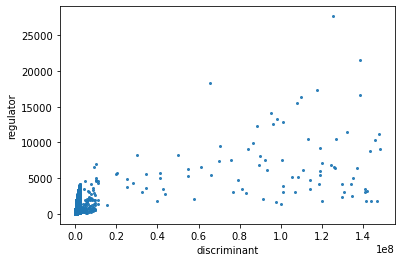

In [10]:
print(df_all.loc[400:410, ['defining_polynomial', 'class_number', 'number_roots_unity', '_2', '_3']])
df_plot = df_all.iloc[0:1000]
#df_plot = df_all
x = df_plot['discriminant'].to_numpy()
y = df_plot['regulator'].to_numpy()
colors = df_all['class_number']
color_map = {1:'red', 2:'blue'}

f = plt.figure()
#plt.scatter(x, y, s=4, alpha=0.9, c=colors.map(color_map))
plt.scatter(x, y, s=4, alpha=0.9)
#plt.title("class 1 (red) and class 2 (blue) for x^2 + bx + c")
plt.xlabel("discriminant")
plt.ylabel("regulator")
plt.show()